## Read custom NanoAOD file

In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, ScoutingNanoAODSchema

In [2]:
fname = "~adlintul/public/scouting/nanoaod/scoutingnano_data.root"
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=ScoutingNanoAODSchema,
).events()

In [3]:
# list all the collections available in the event

events.fields

['L1',
 'ScoutingMuon',
 'ScoutingDisplacedVertex',
 'ScoutingJetCHS',
 'ScoutingTrack',
 'ScoutingRho',
 'ScoutingElectron',
 'luminosityBlock',
 'run',
 'ScoutingFatJetCHS',
 'event',
 'DST',
 'ScoutingParticle',
 'ScoutingPhoton',
 'ScoutingFatJetSK',
 'ScoutingMET',
 'ScoutingPrimaryVertex',
 'ScoutingJet',
 'ScoutingFatJet',
 'TrigObj',
 'ScoutingJetSK',
 'bunchCrossing']

In [4]:
# list all the variables available in a collection

events.ScoutingPhoton.fields

['ecalIso',
 'eta',
 'hOverE',
 'hcalIso',
 'm',
 'phi',
 'pt',
 'r9',
 'sMaj',
 'sMin',
 'sigmaIetaIeta',
 'trackIso',
 'seedId']

In [5]:
# number of events

print(f"Number of events: {len(events)}")

Number of events: 500


In [6]:
# list the number of scouting photons per event

npho = ak.num(events.ScoutingPhoton)

print(f"Number of scouting photons per event:")
for i, n in enumerate(npho):
    if (i > 10): break
    print(f"Event {i}: {n}")

Number of scouting photons per event:
Event 0: 0
Event 1: 0
Event 2: 1
Event 3: 1
Event 4: 2
Event 5: 2
Event 6: 2
Event 7: 5
Event 8: 1
Event 9: 1
Event 10: 0


In [7]:
# show the number of scouting photons in total

print(f"Number of scouting photons in total: {ak.sum(ak.num(events.ScoutingPhoton))}")

Number of scouting photons in total: 725


In [8]:
# L1 information

print(f"Number of events that passed L1_SingleJet180: {ak.sum(events.L1.SingleJet180)}")

# only keep events that passed L1_SingleJet180

events_pass = events[events.L1.SingleJet180]

# veto events which passed L1_SingleJet180

events_veto = events[~events.L1.SingleJet180]

Number of events that passed L1_SingleJet180: 56


In [9]:
# get the scouting electron nearest to each scouting photon

nearEle = events.ScoutingPhoton.nearest(events.ScoutingElectron)

In [10]:
# filter scouting photons

eta_cut = 2
pt_cut = 10

pho1 = events.ScoutingPhoton[abs(events.ScoutingPhoton.eta) < eta_cut]
pho2 = events.ScoutingPhoton[events.ScoutingPhoton.pt > pt_cut]
pho3 = events.ScoutingPhoton[
    (abs(events.ScoutingPhoton.eta) < eta_cut) & 
    (events.ScoutingPhoton.pt > pt_cut)]

## Plot
### (Find more information about hist here: https://hist.readthedocs.io/en/latest/user-guide/notebooks/Histogram.html)
### (Find more plotting scripts here: https://hist.readthedocs.io/en/latest/user-guide/notebooks/Plots.html)

In [11]:
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.CMS)

In [12]:
# define histogram

from hist import Hist
import hist

h = Hist(
    hist.axis.Regular(50, -3, 3, name="eta", label=r"$\eta$", flow=False),
    hist.axis.Regular(50, 0, 100, name="pt", label=r"$p_T$", flow=False),
)

def flatten(a):
    return ak.to_numpy(ak.flatten(a))

In [13]:
# fill histogram

h_pho1 = h.copy().fill(flatten(pho1.eta), flatten(pho1.pt))
h_pho2 = h.copy().fill(flatten(pho2.eta), flatten(pho2.pt))
h_pho3 = h.copy().fill(flatten(pho3.eta), flatten(pho3.pt))

In [14]:
h_pho1

Hist(
  Regular(50, -3, 3, underflow=False, overflow=False, name='eta', label='$\\eta$'),
  Regular(50, 0, 100, underflow=False, overflow=False, name='pt', label='$p_T$'),
  storage=Double()) # Sum: 639.0

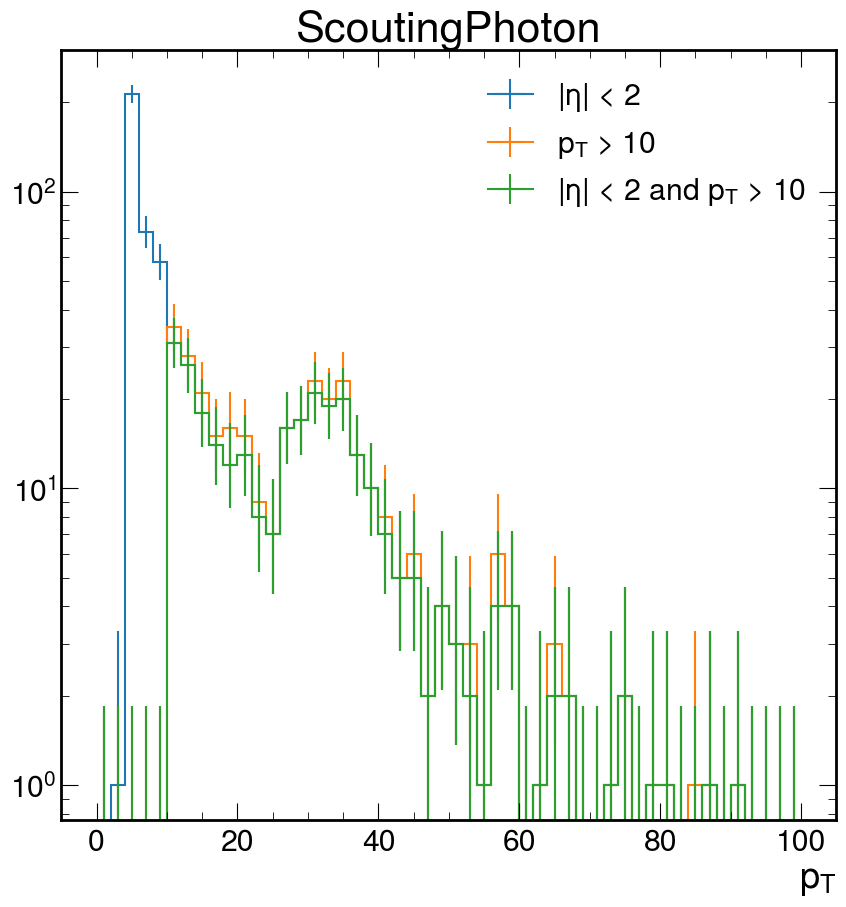

In [15]:
fig, ax = plt.subplots()

h_pho1.project("pt").plot1d(ax=ax, label=r"$|\eta|$" + f" < {eta_cut}")
h_pho2.project("pt").plot1d(ax=ax, label=r"$p_T$" + f" > {pt_cut}")
h_pho3.project("pt").plot1d(ax=ax, label=r"$|\eta|$" + f" < {eta_cut} and " + r"$p_T$" + f" > {pt_cut}")

plt.title("ScoutingPhoton")
plt.legend()
plt.yscale("log")

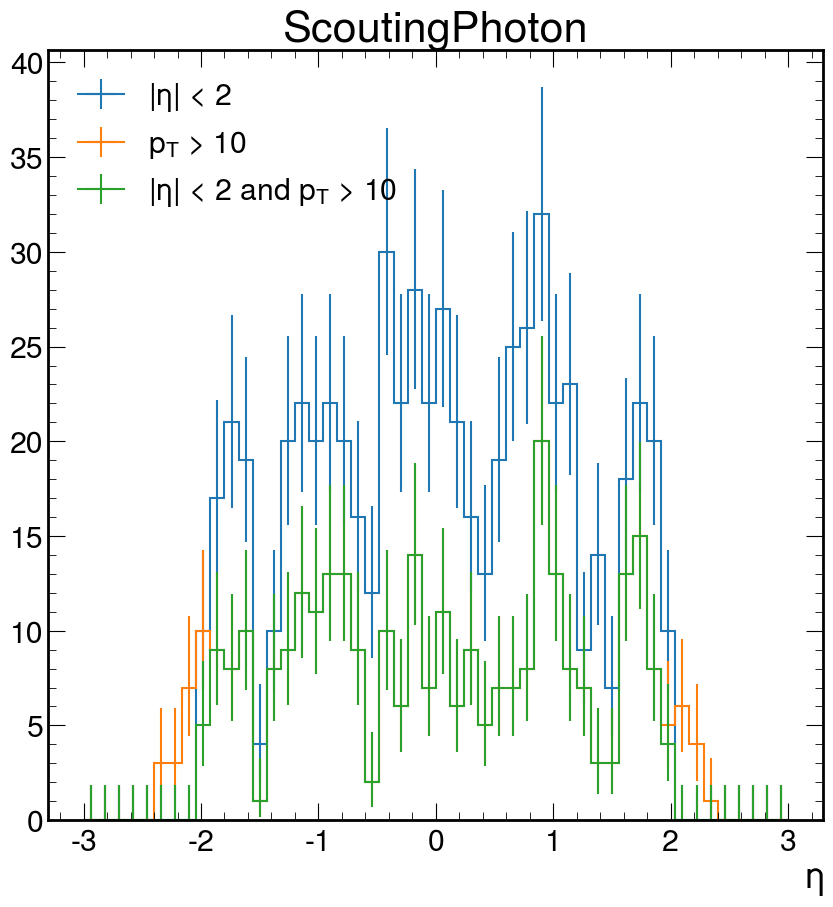

In [16]:
fig, ax = plt.subplots()

h_pho1.project("eta").plot1d(ax=ax, label=r"$|\eta|$" + f" < {eta_cut}")
h_pho2.project("eta").plot1d(ax=ax, label=r"$p_T$" + f" > {pt_cut}")
h_pho3.project("eta").plot1d(ax=ax, label=r"$|\eta|$" + f" < {eta_cut} and " + r"$p_T$" + f" > {pt_cut}")

plt.title("ScoutingPhoton")
plt.legend()

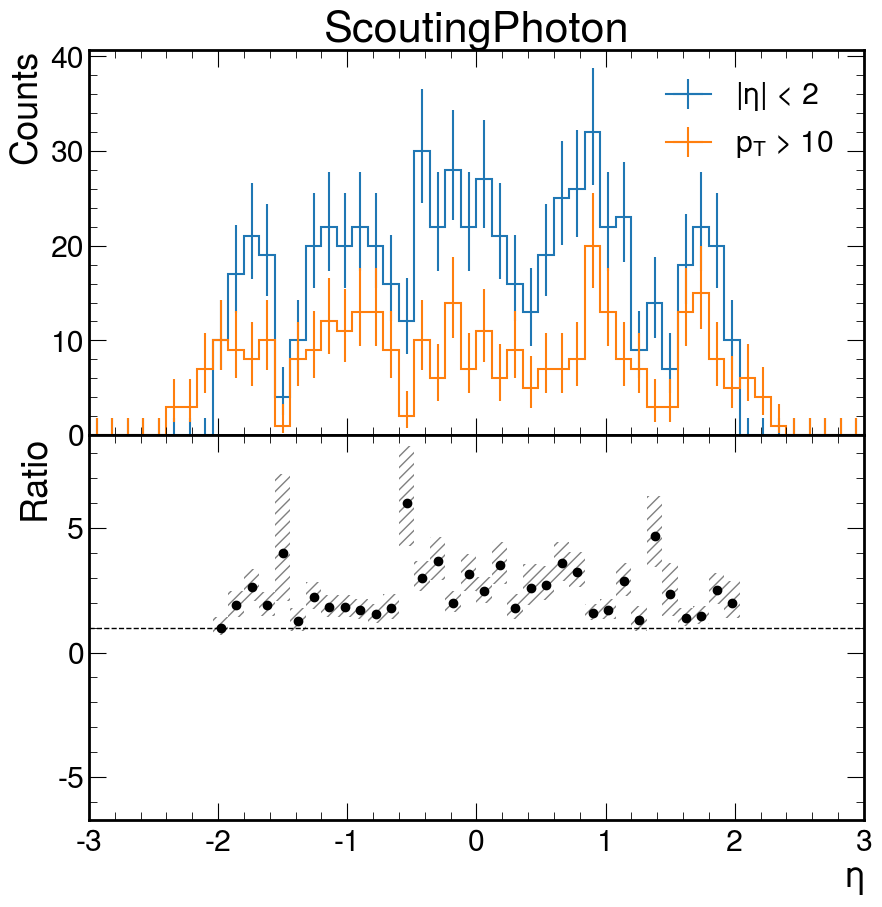

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0)

h_pho1.project("eta").plot_ratio(
    h_pho2.project("eta"),
    rp_ylabel=r"Ratio",
    rp_num_label=r"$|\eta|$" + f" < {eta_cut}",
    rp_denom_label=r"$p_T$" + f" > {pt_cut}",
    rp_uncert_draw_type="bar",  # line or bar
    ax_dict={"main_ax" : ax1, "ratio_ax" : ax2},
)

ax1.set_title("ScoutingPhoton")
plt.show()

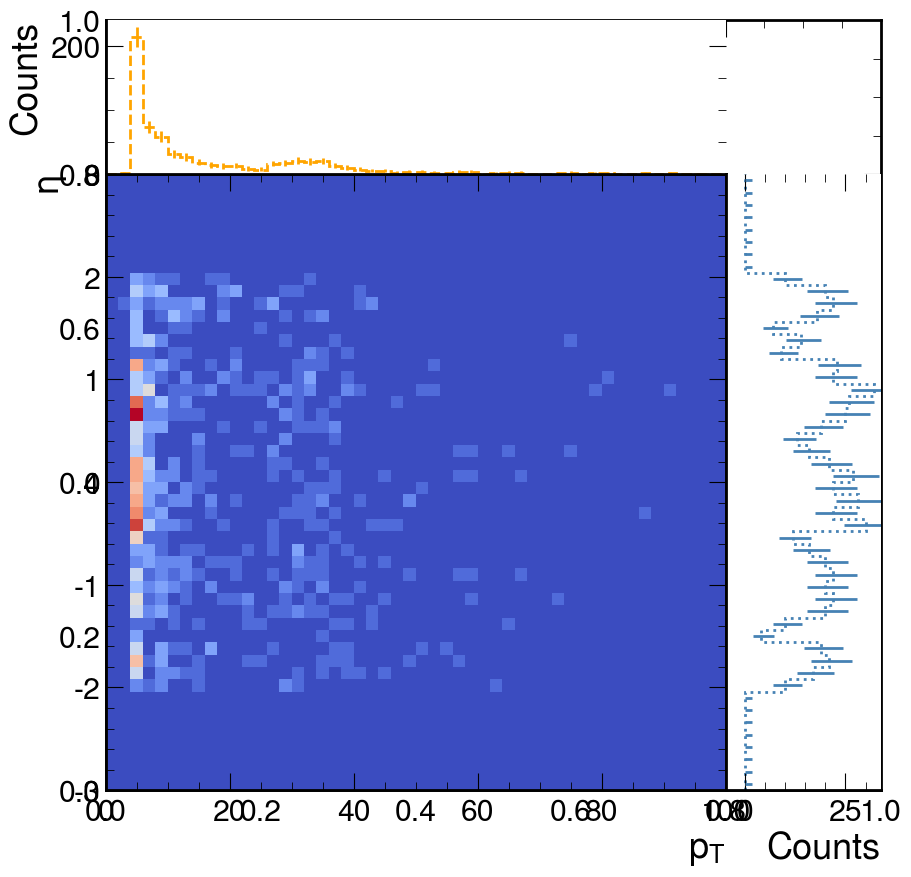

In [18]:
fig, axs = plt.subplots()

h_pho1.project("pt", "eta").plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.show()